<h1><center> How Happy is Our World? </center></h1>
<h3><center> By: Annabelle Baer, Utsa Santhosh, and Gordon Wu </center></h3>
<img src="happy song.jpg"/>

## Introduction

Throughout the years, the United Nations publishes a "World Happiness Report" that gives countries around the world a score that correlates to the quality of life of citizens in the nation. Although 2020 in our eyes might not be the happiest year in the record books, it would be interesting to know which factors impact a country's happiness score. 

The report contains information about a country’s social and economical factors, which together all contribute to receiving a score about the overall happiness of the nation. Some of these factors include the country’s GPD, freedom score, and generosity. Currently, there is data available from 2015-2020, however since the 2020 report was already released, it does not indicate the dramatic effects that COVID has had on a country. This has resulted in some biased data. We will see the true impact of this tumultuous year on the happiness of a country when the 2021 report gets released next year.

Hopefully, through this tutorial, we can learn which factors are important in ensuring happiness in a nation. If you are looking to create your own country, move to a new country, or work to fix the country you are in, stay tuned to learn which important factors might just make you happy. We could all use more these days!


## Data Importing

We need to import data from the Happiness Report from 2015-2020. From there, we need to clean up the data so that all the column names remain consistent throughout the years to aid us when we are calculating our analysis on these countries. After that, we are going to merge all of the datasets from throughout the years together to get one dataset that we can use to determine the top 5 and bottom 5 happiest countries from 2015-2020.

This first block includes everything that we will need to import to find our analysis. Here is what we will use it all for:
1. Pandas:
2. Numpy:
3. Matplotlib:
4. Sklearn:
5. Statsmodels:

In [7]:
# Imports
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as sm

Next we will need to read the csv files into dataframes for each year. The data that was given to us came in the form of a csv file, containing data specific to that year. By using pandas to import it into a dataframe, we are prepping the data to be able to be used together for our analysis.

In [8]:
# reading in each csv
df_2015 = pd.read_csv('Data/2015.csv')
df_2016 = pd.read_csv('Data/2016.csv')
df_2017 = pd.read_csv('Data/2017.csv')
df_2018 = pd.read_csv('Data/2018.csv')
df_2019 = pd.read_csv('Data/2019.csv')
df_2020 = pd.read_csv('Data/2020.csv')

Before we go ahead and merge all of these dataframes together, to make life easier for ourselves later on we are going to rename columns in the dataframes from each year so that they remain consistent throughout the years. When we got our data, since the information was pulled from different years, they did not use the same names for columns (we saw "Happiness Score", "Happiness.score", "Score", etc all relating to the Happiness Score). 

In [9]:
# Rename to standardize columns for names that differ between datasets 
df_2015=df_2015.rename(columns={"Economy": "GDP", "Health (Life Expectancy)":"Life Expectancy", "Trust (Government Corruption)":"Trust"})
df_2016=df_2016.rename(columns={"Economy (GDP per Capita)": "GDP", "Health (Life Expectancy)":"Life Expectancy", "Trust (Government Corruption)":"Trust"})
df_2017=df_2017.rename(columns={"Happiness.Score": "Happiness Score","Economy..GDP.per.Capita.": "GDP", "Health..Life.Expectancy.":"Life Expectancy", "Trust..Government.Corruption.":"Trust"})
df_2018=df_2018.rename(columns={"Score": "Happiness Score","Country or region": "Country","GDP per capita": "GDP","Social support":"Family", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Trust"})
df_2019=df_2019.rename(columns={"Score": "Happiness Score","Country or region": "Country","GDP per capita": "GDP","Social support":"Family", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Trust"})
df_2020=df_2020.rename(columns={"Ladder score": "Happiness Score","Country name": "Country","Logged GDP per capita": "GDP", "Social support":"Family", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Trust"})

Now we are finally going to go ahead and merge all of our dataframes together to form one large dataframe! When merging together, they are merging on "Country", meaning that the final dataset will only contain countries that have appeared in every Happiness report from 2015-2020. This can also lead to some bias since we are excluding countries that may only appear on reports from some years but not all, but since our goal is to see change in happiness score over time it is a good idea to merge them. 

Also, seeing that we renamed our column names to be consistent in the last step, here when merging we see that column names will have the \_year that they are from so that we can distinguish which data is from which year after we merge.

In [4]:
# merging all of the dataframes together into 1
# columns that had the same name will have that name _year that they are from
# They merge on country, so they will only include the countries that appear on each year's csv
# not every year had the same number of countries, so only 138 countries appear on every year's csv
df=pd.merge(df_2015, df_2016, on='Country', suffixes=('_2015', '_2016'))
df=pd.merge(df, df_2017, on='Country', suffixes=('', '_2017'))
df=pd.merge(df, df_2017, on='Country', suffixes=('', '_2017'))
df=pd.merge(df, df_2018, on='Country', suffixes=('', '_2018'))
df=pd.merge(df, df_2019, on='Country', suffixes=('', '_2019'))
df=pd.merge(df, df_2020, on='Country', suffixes=('', '_2020'))

In [5]:
df.head()

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita),Family_2015,Life Expectancy_2015,Freedom_2015,Trust_2015,...,Generosity_2020,Trust_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.124771,0.390843,1.972317,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269


## Determining Happiest and Least Happiest Countries

Seeing that there are over 100 countries that appear on the Happiness Report, we do not want to plot and analyze them all. Instead, we can focus on which factors contribute to countries being the happiest, and which contribute to the countries being the least happy. To do this, we are going to take the average Happiness Score from each country from each year, and then sort the countries by their happiness score to determine the top 5 happiest countries and bottom 5 least happy countries. 

We are then going to add each country's average happiness score from 2015-2020 as a column in the dataframe, so that we can sort the entire dataframe by these values. 

In [10]:
#getting average happiness score
countries = df['Country']
countryNames = countries.unique()
averages = []
new_vals = pd.DataFrame(columns=['Country', 'Average Happiness Score'])
for country in countryNames:
    countryStats = df[df['Country'] == country]
    x2015 = countryStats.iloc[0]['Happiness Score_2015']
    x2016 = countryStats.iloc[0]['Happiness Score_2016']
    x2017 = countryStats.iloc[0]['Happiness Score_2017']
    x2018 = countryStats.iloc[0]['Happiness Score_2018']
    x2019 = countryStats.iloc[0]['Happiness Score_2019']
    x2020 = countryStats.iloc[0]['Happiness Score_2020']
    sumHappy = x2015+x2016+x2017+x2018+x2018+x2020
    avg = sumHappy/6.0
    
    averages.append(avg)
# adding average score to dataframe
df['Average Happiness'] = averages

Now, we are going to go ahead and sort the entire dataframe by these average happiness scores to find out which countries have on average been the happiest from 2015-2020

In [36]:
# sorting the new df based on the average happiness values (last column)
df = df.sort_values(by=['Average Happiness'], ascending=False)

The .head() function of a dataframe gives the top 5 entries, and since we sorted our dataframe we are now able to get our top 5 happiest countries!

In [37]:
# top 5 happiest countries
df.head(n=5)

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita),Family_2015,Life Expectancy_2015,Freedom_2015,Trust_2015,...,Trust_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Average Happiness
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,7.560117
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,7.555100
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,7.538833
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,7.520650
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,7.510083


On the contrary, the .tail() funciton gives the bottom entries of a dataframe. The n=5 signifies that we want the bottom 5 entries.

In [38]:
# bottom 5 least happiest countries
df.tail(n=5)

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita),Family_2015,Life Expectancy_2015,Freedom_2015,Trust_2015,...,Trust_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Average Happiness
119,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,...,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473,3.605233
127,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,...,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963,3.479700
134,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,3.429883
133,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,...,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,3.426650
136,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,0.606935,1.972317,0.000000,0.403575,0.295213,0.275399,0.187402,0.212187,2.401507,3.050050


## Determining Factors that Contribute to Happiness

Now, we want to explore any possible correlations between the top 5 happiest countries versus the lowest 5 happiest countries. We will take the average of the GDP, life expectency, freedom, trust, and generosity of the bottom 5 countries over 5 years and compare them to the same data using the top 5 countries over 5 years.
First, we want to take the 5 year average of each country in the top 5 and bottom 5 years and create a new dataframe for each.

We for each country in the bottom 5 countries, we average all 5 years of each of the 5 attributes. To better organize our data, we will make a new dataframe called bottom_averages and assign each column to a computed average. 

In [76]:
bottom_averages = pd.DataFrame() 
bottom_df = df.tail(n=5)
bottom_countries = bottom_df['Country']
bottom_averages['Country'] = bottom_countries
gdp_averages = []
lifeExp_averages = []
freedom_averages = []
trust_averages = []
generosity_averages = []
for country in bottom_countries:
    bottom = bottom_df[bottom_df['Country'] == country]
    sumGDP = 0
    x2015 = bottom.iloc[0]['Economy (GDP per Capita)']
    x2016 = bottom.iloc[0]['GDP']
    x2017 = bottom.iloc[0]['GDP_2017'][0]
    x2018 = bottom.iloc[0]['GDP_2018']
    x2019 = bottom.iloc[0]['GDP_2019']
    x2020 = bottom.iloc[0]['GDP_2020']
    sumGDP = x2015+x2016+x2017+x2018+x2018+x2020
    GDPavg = sumGDP/6.0
    gdp_averages.append(GDPavg)
    
    sumLifeExp = 0
    x2015 = bottom.iloc[0]['Life Expectancy_2015']
    x2016 = bottom.iloc[0]['Life Expectancy_2016']
    x2017 = bottom.iloc[0]['Life Expectancy_2017']
    x2018 = bottom.iloc[0]['Life Expectancy_2018']
    x2019 = bottom.iloc[0]['Life Expectancy_2019']
    x2020 = bottom.iloc[0]['Life Expectancy_2020']
    sumLifeExp = x2015+x2016+x2017+x2018+x2018+x2020
    lifeExp_avg = sumLifeExp/6.0
    lifeExp_averages.append(lifeExp_avg)
    
    sumFreedom = 0
    x2015 = bottom.iloc[0]['Freedom_2015']
    x2016 = bottom.iloc[0]['Freedom_2016']
    x2017 = bottom.iloc[0]['Freedom_2017']
    x2018 = bottom.iloc[0]['Freedom_2018']
    x2019 = bottom.iloc[0]['Freedom_2019']
    x2020 = bottom.iloc[0]['Freedom_2020']
    sumFreedom = x2015+x2016+x2017+x2018+x2018+x2020
    freedom_avg = sumFreedom/6.0
    
    freedom_averages.append(freedom_avg)
    
    sumTrust = 0
    x2015 = bottom.iloc[0]['Trust_2015']
    x2016 = bottom.iloc[0]['Trust_2016']
    x2017 = bottom.iloc[0]['Trust_2017']
    x2018 = bottom.iloc[0]['Trust_2018']
    x2019 = bottom.iloc[0]['Trust_2019']
    x2020 = bottom.iloc[0]['Trust_2020']
    sumTrust = x2015+x2016+x2017+x2018+x2018+x2020
    trust_avg = sumTrust/6.0
    
    trust_averages.append(trust_avg)
    
    sumGenerosity = 0
    x2015 = bottom.iloc[0]['Generosity_2015']
    x2016 = bottom.iloc[0]['Generosity_2016']
    x2017 = bottom.iloc[0]['Generosity_2017']
    x2018 = bottom.iloc[0]['Generosity_2018']
    x2019 = bottom.iloc[0]['Generosity_2019']
    x2020 = bottom.iloc[0]['Generosity_2020']
    sumGenerosity = x2015+x2016+x2017+x2018+x2018+x2020
    generosity_avg = sumGenerosity/6.0
    
    generosity_averages.append(generosity_avg)
    

bottom_averages['Average GDP'] = gdp_averages
bottom_averages['Average Life Expectancy'] = lifeExp_averages
bottom_averages['Average Freedom'] = freedom_averages
bottom_averages['Average Trust'] = trust_averages
bottom_averages['Average Generosity'] = generosity_averages
bottom_averages.head() 

,Country,Average GDP,Average Life Expectancy,Average Freedom,Average Trust,Average Generosity
119,Yemen,1.726874,9.739081,0.320299,0.187086,0.050318
127,Tanzania,1.690925,9.893622,0.469990,0.164716,0.277069
134,Rwanda,1.530565,10.495427,0.648274,0.430647,0.195007
133,Afghanistan,1.538405,8.959589,0.178532,0.205859,0.212537
136,Burundi,1.141646,9.037174,0.162992,0.172982,0.147509


We repeat the previous step but use the top 5 averages. 

In [78]:
top_averages = pd.DataFrame() 
top_df = df.head(n=5)
top_countries = top_df['Country']
top_averages['Country'] = top_countries
gdp_averages = []
lifeExp_averages = []
freedom_averages = []
trust_averages = []
generosity_averages = []
for country in top_countries:
    top = top_df[top_df['Country'] == country]
    sumGDP = 0
    x2015 = top.iloc[0]['Economy (GDP per Capita)']
    x2016 = top.iloc[0]['GDP']
    x2017 = top.iloc[0]['GDP_2017'][0]
    x2018 = top.iloc[0]['GDP_2018']
    x2019 = top.iloc[0]['GDP_2019']
    x2020 = top.iloc[0]['GDP_2020']
    sumGDP = x2015+x2016+x2017+x2018+x2018+x2020
    GDPavg = sumGDP/6.0
    
    gdp_averages.append(GDPavg)
    
    sumLifeExp = 0
    x2015 = top.iloc[0]['Life Expectancy_2015']
    x2016 = top.iloc[0]['Life Expectancy_2016']
    x2017 = top.iloc[0]['Life Expectancy_2017']
    x2018 = top.iloc[0]['Life Expectancy_2018']
    x2019 = top.iloc[0]['Life Expectancy_2019']
    x2020 = top.iloc[0]['Life Expectancy_2020']
    sumLifeExp = x2015+x2016+x2017+x2018+x2018+x2020
    lifeExp_avg = sumLifeExp/6.0
    
    lifeExp_averages.append(lifeExp_avg)
    
    sumFreedom = 0
    x2015 = top.iloc[0]['Freedom_2015']
    x2016 = top.iloc[0]['Freedom_2016']
    x2017 = top.iloc[0]['Freedom_2017']
    x2018 = top.iloc[0]['Freedom_2018']
    x2019 = top.iloc[0]['Freedom_2019']
    x2020 = top.iloc[0]['Freedom_2020']
    sumFreedom = x2015+x2016+x2017+x2018+x2018+x2020
    freedom_avg = sumFreedom/6.0
    
    freedom_averages.append(freedom_avg)
    
    sumTrust = 0
    x2015 = top.iloc[0]['Trust_2015']
    x2016 = top.iloc[0]['Trust_2016']
    x2017 = top.iloc[0]['Trust_2017']
    x2018 = top.iloc[0]['Trust_2018']
    x2019 = top.iloc[0]['Trust_2019']
    x2020 = top.iloc[0]['Trust_2020']
    sumTrust = x2015+x2016+x2017+x2018+x2018+x2020
    trust_avg = sumTrust/6.0
    
    trust_averages.append(trust_avg)
    
    sumGenerosity = 0
    x2015 = top.iloc[0]['Generosity_2015']
    x2016 = top.iloc[0]['Generosity_2016']
    x2017 = top.iloc[0]['Generosity_2017']
    x2018 = top.iloc[0]['Generosity_2018']
    x2019 = top.iloc[0]['Generosity_2019']
    x2020 = top.iloc[0]['Generosity_2020']
    sumGenerosity = x2015+x2016+x2017+x2018+x2018+x2020
    generosity_avg = sumGenerosity/6.0
    
    generosity_averages.append(generosity_avg)

top_averages['Average GDP'] = gdp_averages
top_averages['Average Life Expectancy'] = lifeExp_averages
top_averages['Average Freedom'] = freedom_averages
top_averages['Average Trust'] = trust_averages
top_averages['Average Generosity'] = generosity_averages
top_averages.head()

,Country,Average GDP,Average Life Expectancy,Average Freedom,Average Trust,Average Generosity
5,Finland,2.898178,12.693001,0.690309,0.364636,0.179738
2,Denmark,2.954274,12.766792,0.695373,0.385560,0.282097
3,Norway,3.108785,12.900075,0.704832,0.330329,0.299081
0,Switzerland,3.051459,13.103173,0.685425,0.369424,0.247678
1,Iceland,2.944695,12.912787,0.687511,0.238739,0.390261


Now we want to compare the average data from the top 5 years to the bottom 5 years and plot them. We will plot the top 5 and bottom 5 averages per country next to each other to best see the relation between the two. In order to plot both the data from the top and the bottom, we can call plt.scatter one after another and they will appear on the same graph. We put the country on the X axis and the average GDP on the Y axis. We do this by accessing the 'Country' and 'Average GDP' columns in the top_averages and bottom_averages dataframes created above and setting them to the x and y values.

Matplotlib's plt.scatter is one way of plotting data. Complete documentation can be found here: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

However, matplotlib provides many alternatives to plotting data. This can be explored here: https://matplotlib.org/.

Text(0, 0.5, 'Average GDP')

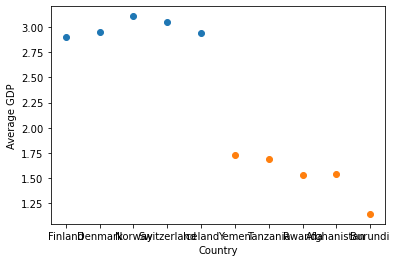

In [85]:
# for column in top_averages.columns.tolist()[1:]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average GDP'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average GDP'])
plt.xlabel('Country')
plt.ylabel('Average GDP')

From this plot, we learned that the top 5 happiest countries average between 2.74 and 4.00 GDP while the bottom 5 countries average below 2.00. This is a simple visualization that allows us to recognize patterns such as this one.

You can see that the Y axis shows a scale of GDP and the X axis shows the countries. Since we used scatter using two different datasets (bottom and top), scatter divided the points into colors depending on the plot. We will now repeat this step for life expectancy, freedom, trust, and generosity.

Text(0, 0.5, 'Average Life Expectancy')

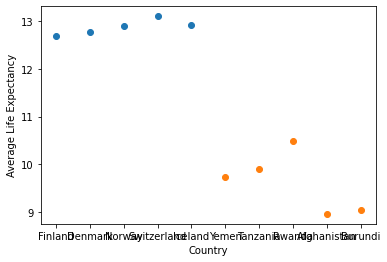

In [86]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Life Expectancy'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Life Expectancy'])
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')

Text(0, 0.5, 'Average Freedom')

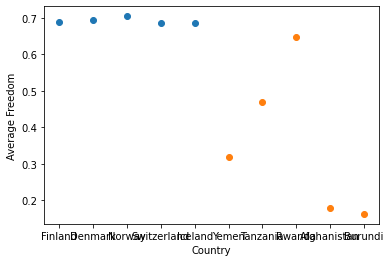

In [87]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Freedom'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Freedom'])
plt.xlabel('Country')
plt.ylabel('Average Freedom')

Text(0, 0.5, 'Average Trust')

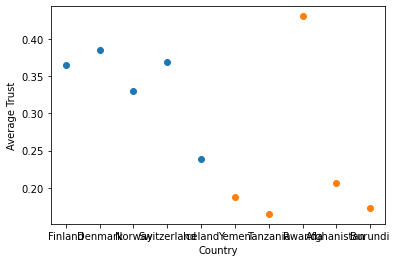

In [88]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Trust'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Trust'])
plt.xlabel('Country')
plt.ylabel('Average Trust')

Text(0, 0.5, 'Average Generosity')

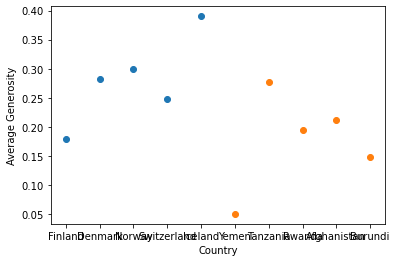

In [89]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Generosity'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Generosity'])
plt.xlabel('Country')
plt.ylabel('Average Generosity')

Throughout the 5 graphs, we see that GDP and life expectancy show very clear disinctions between the top 5 and the bottom 5 countries. Though there is still a distinction between countries with freedom, trust, and generosity, there is much more overlap between the values in the top 5 and the bottom 5. 

Here, there is a very clear distinction between the GDP in the top 5 countries vs the GDP in the bottom 5 countries. Becuase of this, we will run a regression to understand the relation between GDP and overall happiness. We run this on the entire dataframe to understand how all the values show relation. 

In [95]:
df=df.rename(columns={'Happiness Score':'Happiness'})

x = df['GDP'].values.reshape(-1,1)
y = df['Happiness'].values

reg = sm.ols(formula='Happiness ~ GDP', data=df).fit()

lm = linear_model.LinearRegression()
lm.fit(x, y)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     291.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.32e-35
Time:                        16:44:50   Log-Likelihood:                -131.87
No. Observations:                 138   AIC:                             267.7
Df Residuals:                     136   BIC:                             273.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2264      0.139     23.156      0.000       2.951       3.502
GDP            2.2842      0.134     17.062      0.000       2.019       2.549
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.761
Skew:                          -0.077   Prob(JB):                        0.684
Kurtosis:                       2.670   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will print the p value of the regression which will show us how statistically significant the relationship between happiness and GDP is.

In [96]:
print('\t{}'.format(reg.pvalues['GDP']))

	1.3159381177526332e-35


Since the p value is very low, we recognize a high statistical significance between GDP and Happiness, which we assumed previously based on the plot.

## Plotting Countries over Time

Now we want to take a closer look at how factors for countries can change over time. We add a column for year for each of the datasets that we read in, spanning the interval from 2015 to 2020, and then combine these datasets so we can analyze changes over time.

In [94]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

yearly_df = df_2015.append(df_2016).append(df_2017).append(df_2018).append(df_2019).append(df_2020)
yearly_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life Expectancy,Freedom,Trust,...,upperwhisker,lowerwhisker,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the previously found top and bottom 5 countries in average happiness rating over our time interval, we look at how this rating can fluctuate over a span of several years for this sample of countries.

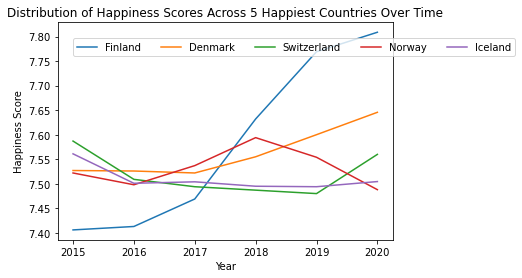

In [95]:
# Plotting happiness of countries over time
happiness = yearly_df.pivot(index="Year", columns="Country",values="Happiness Score")

top5 = ['Finland', 'Denmark', 'Switzerland', 'Norway', 'Iceland']
for country in top5:
    plt.plot(happiness[country], label=country)
    plt.legend(country)


yMax = plt.ylim()[1]
plt.title("Distribution of Happiness Scores Across 5 Happiest Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

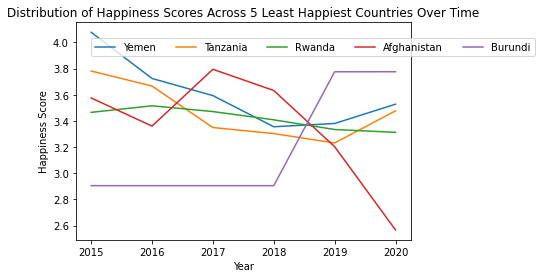

In [96]:
bottom5 = ['Yemen', 'Tanzania', 'Rwanda', 'Afghanistan', 'Burundi']
for country in bottom5:
    plt.plot(happiness[country], label=country)
    plt.legend(country)


yMax = plt.ylim()[1]
plt.title("Distribution of Happiness Scores Across 5 Least Happiest Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

## Looking for Consistent Factors

Now to take a closer look at the different factors that could affect this happiness rating for each country, we will inspect the following variables: GDP, Life Expectancy, Freedom, Trust, and Generosity. This way, for each country we can look at how these attributes fluctuate over our time interval.

In [97]:
yearly_df1 = yearly_df[['Country','Year','Happiness Score','GDP','Life Expectancy','Freedom','Trust','Generosity']]
top5_factors = yearly_df1[yearly_df1['Country'].isin(['Iceland'])]
top5_factors

,Country,Year,Happiness Score,GDP,Life Expectancy,Freedom,Trust,Generosity
1,Iceland,2015,7.5610,1.302320,0.947840,0.628770,0.141450,0.436300
2,Iceland,2016,7.5010,1.426660,0.867330,0.566240,0.149750,0.476780
2,Iceland,2017,7.5040,1.480633,0.833552,0.627163,0.153527,0.475540
3,Iceland,2018,7.4950,1.343000,0.914000,0.677000,0.138000,0.353000
3,Iceland,2019,7.4940,1.380000,1.026000,0.591000,0.118000,0.354000
3,Iceland,2020,7.5045,10.772559,73.000000,0.948892,0.711710,0.246944


We construct plots for each of the 5 variables we've mentioned over time for the 5 highest and lowest countries that we've been using as our sample.

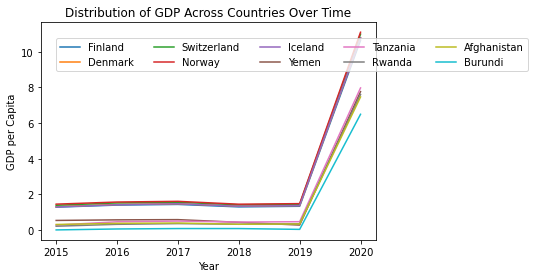

In [98]:
top5.extend(bottom5)
countries = top5
gdp = yearly_df.pivot(index="Year", columns="Country",values="GDP")
for country in countries:
    plt.plot(gdp[country], label=country)
    plt.legend(country)

yMax = plt.ylim()[1]
plt.title("Distribution of GDP Across Countries Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

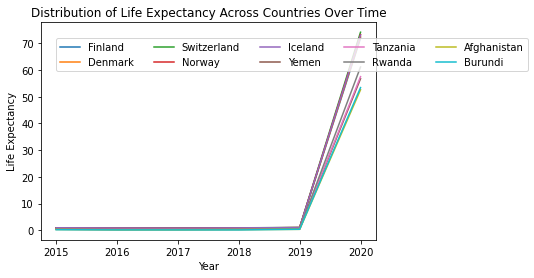

In [99]:
life = yearly_df.pivot(index="Year", columns="Country",values="Life Expectancy")
for country in countries:
    plt.plot(life[country], label=country)
    plt.legend(country)

yMax = plt.ylim()[1]
plt.title("Distribution of Life Expectancy Across Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

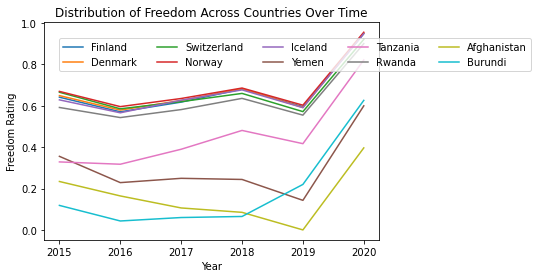

In [100]:
freedom = yearly_df.pivot(index="Year", columns="Country",values="Freedom")
for country in countries:
    plt.plot(freedom[country], label=country)
    plt.legend(country)

yMax = plt.ylim()[1]
plt.title("Distribution of Freedom Across Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Freedom Rating")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

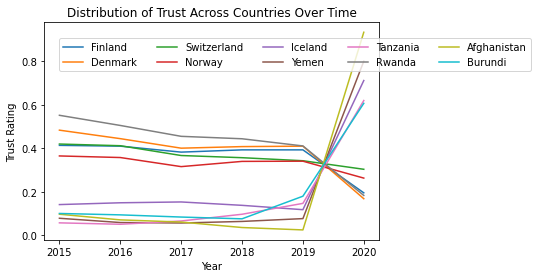

In [101]:
trust = yearly_df.pivot(index="Year", columns="Country",values="Trust")
for country in countries:
    plt.plot(trust[country], label=country)
    plt.legend(country)

yMax = plt.ylim()[1]
plt.title("Distribution of Trust Across Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Trust Rating")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

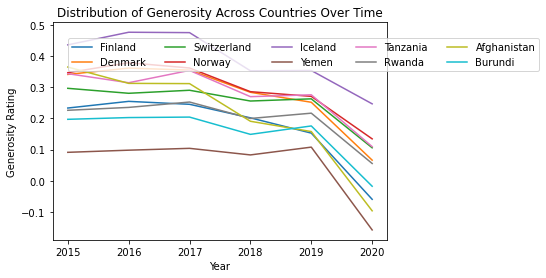

In [102]:
generosity = yearly_df.pivot(index="Year", columns="Country",values="Generosity")
for country in countries:
    plt.plot(generosity[country], label=country)
    plt.legend(country)

yMax = plt.ylim()[1]
plt.title("Distribution of Generosity Across Countries Over Time")
plt.xlabel("Year")
plt.ylabel("Generosity Rating")
plt.legend(bbox_to_anchor=(0.03,0.95), loc=2, ncol=5)
plt.show()

From inspecting the time plots we can see that for the Freedom rating variable, there is a clear distinction and separation in value between the top 5 countries and the bottom 5 in terms of happiness rating. Because of this, we will choose to run a linear regression analysis on the Freedom variable.

In [120]:
yearly_df=yearly_df.rename(columns={'Happiness Score':'Happiness'})

x = yearly_df['Freedom'].values.reshape(-1,1)
y = yearly_df['Happiness'].values

reg = sm.ols(formula='Happiness ~ Freedom', data=yearly_df).fit()

lm = linear_model.LinearRegression()
lm.fit(x, y)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     207.2
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.42e-42
Time:                        07:07:52   Log-Likelihood:                -1342.5
No. Observations:                 935   AIC:                             2689.
Df Residuals:                     933   BIC:                             2699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2737      0.085     50.468      0.000       4.107       4.440
Freedom        2.3745      0.165     14.395      0.000       2.051       2.698
==============================================================================
Omnibus:                       27.870   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.549
Skew:                          -0.194   Prob(JB):                     0.000155
Kurtosis:                       2.453   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# Print P value
print('\t{}'.format(reg.pvalues['Freedom']))

	1.4216711837834532e-42


### Conclusion

From plotting each attribute, it is clear that there is a differenciation between the top 5 and bottom 5 countries for all 5 attribute. However, the plots made it clear that life expectancy and GDP showed the greatest difference. Because of this, we ran the regression on GDP versus happiness and found that the p-value of 1.3159381177526332e-35 